# Programmatic access webinar: Data Model

For this part of the presentation, we will run through the general structure of the released data and walk through where to what to expect when looking through data for a specific project.

We'll be extensively referencing the content on [Allen Brain Cell Atlas - Data Access](https://alleninstitute.github.io/abc_atlas_access/intro.html)

## Available datasets

The [landing page for ABC Atlas Access](https://alleninstitute.github.io/abc_atlas_access/intro.html) currently lists 7 datasets that are available for download through our Python Library. They are listed below with short descriptions for each.

- **Mouse data**
  - [Mouse whole-brain transcriptomic cell type atlas](descriptions/WMB_dataset.md)
    (Hongkui Zeng)
    - Whole mouse brain dataset with both single cell and spatial transcriptomic data. Contains a 4 level taxonomy with 5,322 celltype clusters. Additionally contains definitions for the Common Coordinate Framework (CCFv3) of structures across the whole mouse brain.
  - [A molecularly defined and spatially resolved cell atlas of the whole mouse brain](descriptions/Zhuang_dataset.md)
    (Xiaowei Zhuang)
    - Four Whole mouse brain spatial transcriptomic dataset with anatomic and taxonomic registrations. Uses the 4 level taxonomy mentioned above.
  - [Consensus Whole Mouse Brain cell type atlas](descriptions/Consensus-WMB-dataset.md) (Evan Macosko, Hongkui Zeng)
    - Combines two whole mouse brain single cell and nuclei datasets. The first data is the same, [whole mouse brain dataset, 10X](descriptions/WMB_dataset.md) data while the second is the whole mouse brain data from the Evan Macosko lab. A joint taxonomy is derived from these two datasets and published along side the combined gene expression data.
  - [Aging Mouse transcriptomic cell type atlas](descriptions/Zeng_Aging_Mouse_dataset.md)
    (Hongkui Zeng)
      - 1.2 million single cell transcriptoms of adult and aged mice. Includes 847 cell type clusters matched into the supertype level of the `Mouse whole-brain transcriptomic cell type atlas` taxonomy.
- **Human data**
  - [Human whole-brain transcriptomic cell type atlas](descriptions/WHB_dataset.md)
    (Kimberly Siletti)
    - Whole human brain transcriptomics and taxonomy derived from roughly 3 million cells.
  - [Human Postmortem-Derived Brain Sequencing Collection](descriptions/ASAP-PMDBS_dataset.md) (ASAP)
    - Data from the Aligning Science Across Parkinson's (ASAP) with registrations into the Siletti, whole human brain taxonomy and the [SEA-AD taxonomy](https://brain-map.org/consortia/sea-ad).
- **Multi-Species data**
  - [Human-Mammalian Brain - Basal Ganglia](descriptions/HMBA-BG_dataset.md) (HMBA)
    - Mutli-Species (Human, Macaque, Marmoset) single cell and spatial transcriptomic data coving the basal ganglia. Contains a cross species taxonomy of cell types in the basal ganglia.

## Data structure

In this section, we'll describe the general structure of the data you'll find in the cloud and on disk once you have downloaded them. We'll get into the specifics of the Python tool we will use to download the data in a later section of this notebook.

Each of the projects listed above can be broken up into different directories based on data modality, species, and/or donor. When a project comes with it's own taxonomy (e.g The whole mouse brain, aging mouse, whole human brain, and basal ganglia datasets), these taxonomy files are always in a separate directory. Below the modality directory are several divisions, one of each data type: gene expression, metadata, image volumes and MapMyCells.

In general the data structure can be conceptualized as:

- Project
  - Directory (e.g. modality, species, taxonomy)
    - gene expression data (e.g. h5ad files)
    - metadata (e.g. csv files)
    - image volumes data (e.g. nii.gz, "niffty" files, geojson polygon files)
    - mapmycelss (we don't discuss in this demo but this folder contains model files for [MapMyCells](https://brain-map.org/bkp/analyze/mapmycells) and are available through this release packaging)


### Specific Example

Now we'll show a concrete example using the [Human-Mammalian Brain - Basal Ganglia (HMBA-BG)](descriptions/HMBA-BG_dataset.md) release data. This project contains 2 different transcriptomic modalities and a taxonomy. 

Below we list the names of the directories in this project and grossly what kind of files are in each.

**Single Cell Transcriptomic**:
- HMBA-10xMultiome-BG: (individual species data)
  - expression matrices
  - metadata
- HMBA-10xMultiome-BG-Aligned: (Aligned expression across species)
  - expression matrices
  - metadata
  - image volumes
  - mapmycells

**Taxonomy**:
- HMBA-BG-taxonomy-CCN20250428
  - metadata
  - mapmycells

**Spatial Transcriptomic**:
- HMBA-MERSCOPE-H22.30.001-BG: Human spatial data
  - expression matrices
  - metadata
  - image volumes
- HMBA-MERSCOPE-QM23.50.001-BG: Macaque spatial data
  - expression matrices
  - metadata
  - image volumes
- HMBA-Xenium-CJ23.56.004-BG: Marmoset spatial data
  - expression matrices
  - metadata
  - image volumes

The structure above mirrors what is described on the individual pages of [Human-Mammalian Brain - Basal Ganglia (HMBA-BG)](descriptions/HMBA-BG_dataset.md). This page and the pages for all the projects can be used in general as a guide for what data is available for a given project. For each project, there are also notebooks available that show how one can interact with the data. For our specific sample here, the notebooks related to the HMBA-BG data can be found at the following link: [https://alleninstitute.github.io/abc_atlas_access/descriptions/HMBA-BG_notebooks.html](https://alleninstitute.github.io/abc_atlas_access/descriptions/HMBA-BG_notebooks.html)

In the next section we'll dive deeper into the metadata of the HMBA-10xMultiome-BG-Aligned directory and the taxonomy derived from it. 

## Data types in specific directories

Now that we've walked through the high level of a specific project let's go deeper and look into the structure of the metadata and h5ad files for the HMBA-10xMultiome-BG-Aligned and the taxonomy derived from it, HMBA-BG-taxonomy-CCN20250428.

### Gene expression Data

Expression matrices are provided in raw counts (when available) and log2 normalized, usually as counts-per-million (CPM) but also counts-per-thousand (CPT) in specific cases (e.g. some spatial data). The matrices are packaged in the [anndata](https://anndata.readthedocs.io/en/stable/) format, h5ad, in a compressed, sparse matrix, `X` with minimal metadata in `obs` and `var`, attempting to reduce the file size. The `obs` is a version of the `cell_metadata` table with a sub-set of the columns. It is keyed on `cell_label`. `var` is likewise a version of the gene table with a sub-set of columns. It is keyed on `gene_identifier` which is usually an NCBI or ENSEMBL identifier. A later tutorial as part of this presentation will go deeper into the h5ad format.

- [HMBA-10xMultiome-BG-Aligned](https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/index.html#expression_matrices/HMBA-10xMultiome-BG-Aligned/20250630/):
  - HMBA-10xMultiome-BG-Aligned-raw.h5ad
    - X
    - obs
    - var
  - HMBA-10xMultiome-BG-Aligned-log2.h5ad
    - X
    - obs
    - var

### Metadata

We store metadata associated with the cells (e.g. donor, taxonomic assignments, region of interest, plotting color, ontological order information) in csv, plain text tables. The specifics of what tables are available and what columns are in those tables depends on the dataset and the modality of the data (e.g. single cell, spatial). At minimum one can expect a `cell_metadata` table keyed on the unique cell identifier `cell_label`, a `donor` table keyed on a unique `donor_label` and containing information such as the donor sex, age, species, and a `gene` table listing the genes in the expression matrix with identifiers, symbols, and other descriptive information. These metadata also contain a `value_sets` table that provides colors, plotting orders, and identifiers if available for the various metadata values (e.g. structure information, species, sex). Below we list the files that are in our MBA-10xMultiome-BG-Aligned directory and examples of what metadata information is in each.

Metadata in these directories can also include tables defining spatial or Uniform manifold approximation and projection (UMAP) coordinates. These are keyed on `cell_label` and can be joined with the `cell_metadata` table. We'll go into examples in depth later in this notebook.

- [HMBA-10xMultiome-BG-Aligned](https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/index.html#metadata/HMBA-10xMultiome-BG-Aligned/20250630/):
  - cell_metadata: `donor_label`, `library_label`
  - donor: `donor_age`, `donor_sex`, `donor_species`
  - library: `region_of_interset_label` (brain structure the cells/nuclei were extracted from)
  - gene: `gene_identifier`, `gene_symbol`
  - value_sets: colors, plotting orders for (e.g.), `region_of_interset_label`, `donor_sex`
  - views:
    - example_gene_expression: expression for specific genes for use in plotting examples.

### Taxonomy metadata

The taxonomy is defined over multiple metadata csv tables. These tables describe the individual taxons, the levels of the hierarchy, how the taxons are linked together in the hierarchy, and how the cells used to create the taxonomy are distributed within the taxonomy. This directory can also contain their UMAP. The metadata also includes color and plotting order information. For a more in depth look at how the taxonomy data is utilized, you can look at [this notebook](https://alleninstitute.github.io/abc_atlas_access/notebooks/hmba_bg_clustering_analysis_and_annotation.html#taxonomy-informatio). We'll list the files below and give a short description of the data in each.

- [HMBA-BG-taxonomy-CCN20250428](https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/index.html#metadata/HMBA-BG-taxonomy-CCN20250428/20250630/)
  - cluster: This file contains all taxons at the leaf level of the taxonomy
  - cluster_annotation_term_set: table describing the levels of the taxonomy (number of levels, names of the levels etc.)
  - cluster_annotation_term: Table describing each taxon including parent/child relationships.
  - cluster_to_cluster_annotation_membership: Each row is a map of a leaf taxon to a parent taxon one or more levels up in the taxonomy. This includes mapping a leaf taxon to itself.
  - cell_to_cluster_membership: map of each cell into a leaf level taxon.
  - cell_2d_embedding_coordinates: UMAP coordinates for this dataset.

## ABC Atlas Access Cache

While the data is available through the web content linked above through the website, this isn't the recommended way of downloading and interacting with the data. Instead we provide a lightweight cache object that can be used for browsing and downloading the data as needed.

In this section, we'll use the cache object to download a few of the metadata csv tables. We'll be loading and interacting with these csv tables using [Pandas](https://pandas.pydata.org/), a python library for interacting with tabular data. For a more in depth look at using the cache object, see the [getting started notebook](https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html).

We'll start by first importing the packages we will use interact with the data.

In [1]:
import pandas as pd # loads the Pandas library and renames it as pd for easier access
from pathlib import Path # imports the Path class from the pathlib module for filesystem path manipulations

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache # imports the AbcProjectCache class from the abc_atlas_access package

Below we specific the location where we would like to download data to on our local disk. Here this is named `abc_atlas`. This can be changed to any path you specify.

Once we define this `download_base` variable, we instantiate our download cache object. Code will download data as we request it and remember what data has been downloaded. We ask the cache what manifest version is currently loaded. The version we see is `20251031`, this is the latests version of the manifest as of Jan 28th, 2026. If you run this notebook in the future, this version will change as we include more data and make it available through this cache object.

In [2]:
download_base = Path('../../data/abc_atlas') # Change download base path as needed
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20251031/manifest.json'

We'll first list the data directories that the cache object knows about. This is list the directories that are available. You should notice the names of the directories that we've explored previously.

In [3]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'Consensus-WMB-AIBS-10X',
 'Consensus-WMB-Macosko-10X',
 'Consensus-WMB-integrated-taxonomy',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'HMBA-MERSCOPE-H22.30.001-BG',
 'HMBA-MERSCOPE-QM23.50.001-BG',
 'HMBA-Xenium-CJ23.56.004-BG',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF',
 'mmc-gene-mapper']

Let's first list some of the files that we've discussed previously.

Firstly, let's list the gene expression matrices available as part of the `HMBA-10xMultiome-BG-Aligned`.

In [4]:
# List the expression matrix files, both raw and log2.
abc_cache.list_expression_matrix_files(
    'HMBA-10xMultiome-BG-Aligned'
)

['HMBA-10xMultiome-BG-Aligned/log2', 'HMBA-10xMultiome-BG-Aligned/raw']

Now, we'll list the metadata files.

In [5]:
# List the metadata files
abc_cache.list_metadata_files(
    'HMBA-10xMultiome-BG-Aligned'
)

['cell_metadata',
 'donor',
 'example_gene_expression',
 'gene',
 'library',
 'value_sets']

And finally, we'll list the files that are in the taxonomy directory.

In [6]:
# List the taxonomy metadata files
abc_cache.list_metadata_files(
    'HMBA-BG-taxonomy-CCN20250428'
)

['abbreviation_term',
 'cell_2d_embedding_coordinates',
 'cell_to_cluster_membership',
 'cluster',
 'cluster_annotation_term',
 'cluster_annotation_term_set',
 'cluster_annotation_to_abbreviation_map',
 'cluster_to_cluster_annotation_membership']

If you forget the functions available on the cache object, a useful function to use is `dir`. This will list all the methods available for a given Python object.

In [7]:
dir(abc_cache)

['MANIFEST_COMPATIBILITY',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_default_bucket_name',
 '_get_directory_files',
 '_get_local_path',
 '_local',
 '_ui_class_name',
 '_warn_directory_size',
 'cache',
 'compare_manifests',
 'current_manifest',
 'from_cache_dir',
 'from_local_cache',
 'from_s3_cache',
 'get_data_path',
 'get_directory_expression_matrices',
 'get_directory_expression_matrix_size',
 'get_directory_image_volume_size',
 'get_directory_image_volumes',
 'get_directory_mapmycells',
 'get_directory_mapmycells_size',
 'get_directory_metadata',
 'get_directory_metadata_size',
 'get_directory_size_by_kind',
 'get_file_path',
 'get_metadata

### Loading data

Now we'll load the `cell_metadata` for this directory and investigate it and the other metadata further. We'll also show some basic actions we can do with Pandas.

The primary method we'll use here is `get_metadata_dataframe`. This downloads the data if needed, and loads it as a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). If we forget what inputs this function takes, we can use a `?` to list the doc string and method signature for this method. We do this below. 

In [8]:
?abc_cache.get_metadata_dataframe

Signature:
abc_cache.get_metadata_dataframe(
    directory: str,
    file_name: str,
    force_download: bool = False,
    skip_hash_check: bool = False,
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Get the metadata table with the given file name. Download the file if
using a S3Cache and the file is not currently on disk.

Parameters
----------
directory: str
    The directory in which the metadata file is stored.
file_name: str
    The name of the metadata file.
force_download: bool
    If True, force the file to be downloaded even if it already exists
    locally.
skip_hash_check: bool
    If True, skip the file hash check for file integrity.
**kwargs
   Keyword arguments to pass to pandas.read_csv

Returns
-------
data_frame: pandas.DataFrame
    Dataframe of the requested metadata file.
File:      ~/src/abc_atlas_access/src/abc_atlas_access/abc_atlas_cache/abc_project_cache.py
Type:      method

Now, let's use the function to load the `cell_metadata` and display the first few rows using the Pandas method `.head()`

In [9]:
# The below code loads and displays the "head" or first few rows of the cell metadata
cell_metadata = abc_cache.get_metadata_dataframe(
    directory='HMBA-10xMultiome-BG-Aligned', file_name='cell_metadata'
)
cell_metadata.head()

/Users/chris.morrison/src/abc_atlas_access/src/abc_atlas_access/abc_atlas_cache/abc_project_cache.py:643: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, **kwargs)


,cell_label,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id
0,AAACAGCCAAATGCCC-2362_A05,AAACAGCCAAATGCCC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027027,15259.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,38447b19-a5dc-4eca-9021-56ae191e8809
1,AAACAGCCAATTGAGA-2362_A05,AAACAGCCAATTGAGA,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.054795,20645.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,3dc4dc1f-4b8a-4012-bb07-e3906ad70da0
2,AAACAGCCAGCATGTC-2362_A05,AAACAGCCAGCATGTC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2551.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,291d6ebf-ca70-4d9d-8dde-10fa841dba93
3,AAACAGCCATTGACAT-2362_A05,AAACAGCCATTGACAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2341.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,12153419-9b49-4d5f-a10d-ddb7837a729d
4,AAACAGCCATTGTGGC-2362_A05,AAACAGCCATTGTGGC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,8326.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,5716499d-d69d-489e-b4ed-6841b6ba051d


In the table, we see `cell_label`, `donor_label`, and `library_label` which are the primary keys for the `cell_metadata`, `donor`, and `library` tables respectively.

Since `cell_label` is the primary key for the `cell_metadata` we'll set it as the index of our Pandas DataFrame. This allows quickly reference individual cells in the data. To do this, we use the method `set_index` on our DataFrame.

In [10]:
cell_metadata = cell_metadata.set_index('cell_label')
cell_metadata.head()

,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id
cell_label,,,,,,,,,,
AAACAGCCAAATGCCC-2362_A05,AAACAGCCAAATGCCC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027027,15259.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,38447b19-a5dc-4eca-9021-56ae191e8809
AAACAGCCAATTGAGA-2362_A05,AAACAGCCAATTGAGA,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.054795,20645.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,3dc4dc1f-4b8a-4012-bb07-e3906ad70da0
AAACAGCCAGCATGTC-2362_A05,AAACAGCCAGCATGTC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2551.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,291d6ebf-ca70-4d9d-8dde-10fa841dba93
AAACAGCCATTGACAT-2362_A05,AAACAGCCATTGACAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2341.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,12153419-9b49-4d5f-a10d-ddb7837a729d
AAACAGCCATTGTGGC-2362_A05,AAACAGCCATTGTGGC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,8326.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,5716499d-d69d-489e-b4ed-6841b6ba051d


### Selections items in the DataFrame

Let's look at a few ways to access specific parts of the DataFrame/table. We'll show accessing individual rows, multiple rows, columns, and selection rows by values in an individual (or multiple) column(s).

In our first example, we show grabbing individual cells or a group of cells using `.loc`. This is done by using the values of the `cell_label` index.

In [11]:
cell_metadata.loc['AAACAGCCAGCATGTC-2362_A05']

cell_barcode                                          AAACAGCCAGCATGTC
donor_label                                                 H24.30.001
barcoded_cell_sample_label                                    2362_A05
library_label                                       L8XR_240808_01_E02
alignment_job_id              8a4bf81821a0f425be8ba9c15dfad6b509020312
doublet_score                                                      0.0
umi_count                                                       2551.0
feature_matrix_label                       HMBA-10xMultiome-BG-Aligned
dataset_label                              HMBA-10xMultiome-BG-Aligned
abc_sample_id                     291d6ebf-ca70-4d9d-8dde-10fa841dba93
Name: AAACAGCCAGCATGTC-2362_A05, dtype: object

In [12]:
cell_metadata.loc[
    ['AAACAGCCAGCATGTC-2362_A05',
     'AAACAGCCATTGTGGC-2362_A05']
]

,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id
cell_label,,,,,,,,,,
AAACAGCCAGCATGTC-2362_A05,AAACAGCCAGCATGTC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2551.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,291d6ebf-ca70-4d9d-8dde-10fa841dba93
AAACAGCCATTGTGGC-2362_A05,AAACAGCCATTGTGGC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,8326.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,5716499d-d69d-489e-b4ed-6841b6ba051d


We can also select individual or multiple columns but either using the a string or a list of names of columns.

In [13]:
cell_metadata['library_label'].head()

cell_label
AAACAGCCAAATGCCC-2362_A05    L8XR_240808_01_E02
AAACAGCCAATTGAGA-2362_A05    L8XR_240808_01_E02
AAACAGCCAGCATGTC-2362_A05    L8XR_240808_01_E02
AAACAGCCATTGACAT-2362_A05    L8XR_240808_01_E02
AAACAGCCATTGTGGC-2362_A05    L8XR_240808_01_E02
Name: library_label, dtype: object

In [14]:
cell_metadata[['library_label', 'doublet_score']].head()

,library_label,doublet_score
cell_label,,
AAACAGCCAAATGCCC-2362_A05,L8XR_240808_01_E02,0.027027
AAACAGCCAATTGAGA-2362_A05,L8XR_240808_01_E02,0.054795
AAACAGCCAGCATGTC-2362_A05,L8XR_240808_01_E02,0.000000
AAACAGCCATTGACAT-2362_A05,L8XR_240808_01_E02,0.000000
AAACAGCCATTGTGGC-2362_A05,L8XR_240808_01_E02,0.027397


We can also combine selecting by row and by feature.

In [15]:
cell_metadata.loc[
    ['AAACAGCCAGCATGTC-2362_A05',
     'AAACAGCCATTGTGGC-2362_A05'],
     ['library_label', 'doublet_score']
]

,library_label,doublet_score
cell_label,,
AAACAGCCAGCATGTC-2362_A05,L8XR_240808_01_E02,0.000000
AAACAGCCATTGTGGC-2362_A05,L8XR_240808_01_E02,0.027397


Another way we can select rows is by slicing. We show examples below for retrieving the frist 100 cells, a set of 100 cells in the middle of the data frame, last hundred cells, and every 10th cell. There are however, many more ways of doing this selection.

In [16]:
cell_metadata[:100]
cell_metadata[12345:12456]
cell_metadata[-100:]
cell_metadata[::10].head()

,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id
cell_label,,,,,,,,,,
AAACAGCCAAATGCCC-2362_A05,AAACAGCCAAATGCCC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027027,15259.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,38447b19-a5dc-4eca-9021-56ae191e8809
AAACCAACATGCAACC-2362_A05,AAACCAACATGCAACC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,5075.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,440e96d9-2158-4d8e-b3a2-75bdcf5e28e2
AAACCGGCAATACTGT-2362_A05,AAACCGGCAATACTGT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.081081,94545.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,10c093ee-748f-49aa-bfe0-37e10ce705d7
AAAGCAAGTCACAAAT-2362_A05,AAAGCAAGTCACAAAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.095890,35713.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,367839b1-c1e5-41cd-9169-70a64601a33c
AAAGCCGCAGTCTAAT-2362_A05,AAAGCCGCAGTCTAAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,16254.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,ed0274c7-439e-4351-baa9-5832e6e17f9d


### Masking

Let's say we want to select the cells from a specific donor. We can do so by first creating a mask of cells where `donor_label` is a specific value. This returns and array of True/False boolean values that we can used with our cell_metadata table. We demo this below.

In [17]:
donor_mask = cell_metadata['donor_label'] == 'H24.30.001'
donor_mask

cell_label
AAACAGCCAAATGCCC-2362_A05     True
AAACAGCCAATTGAGA-2362_A05     True
AAACAGCCAGCATGTC-2362_A05     True
AAACAGCCATTGACAT-2362_A05     True
AAACAGCCATTGTGGC-2362_A05     True
                             ...  
GCAAACTTCATGTGGT-P0074_3     False
GACCTGATCATAACTG-P0074_3     False
GAACTTATCCTAAATG-P0074_3     False
CTTATTGGTCTTTGAC-P0074_3     False
AATTCGTCAAAGCTCC-P0074_3     False
Name: donor_label, Length: 1896133, dtype: bool

We then use the mask as below to select only the cells that are from this donor. Masking can be used to select cells with specific values for instance cells from a specific region or of a specific cell type. This pattern can work with any column and set of values as long as we can define the boolean array. 

In [18]:
cell_metadata[donor_mask].head()

,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id
cell_label,,,,,,,,,,
AAACAGCCAAATGCCC-2362_A05,AAACAGCCAAATGCCC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027027,15259.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,38447b19-a5dc-4eca-9021-56ae191e8809
AAACAGCCAATTGAGA-2362_A05,AAACAGCCAATTGAGA,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.054795,20645.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,3dc4dc1f-4b8a-4012-bb07-e3906ad70da0
AAACAGCCAGCATGTC-2362_A05,AAACAGCCAGCATGTC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2551.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,291d6ebf-ca70-4d9d-8dde-10fa841dba93
AAACAGCCATTGACAT-2362_A05,AAACAGCCATTGACAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2341.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,12153419-9b49-4d5f-a10d-ddb7837a729d
AAACAGCCATTGTGGC-2362_A05,AAACAGCCATTGTGGC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,8326.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,5716499d-d69d-489e-b4ed-6841b6ba051d


### Groupby

One last example we'll show is using the Pandas `groupby` functionality to get the counts of cells for each donor. You can find more examples of what can be done with `groupby` in both the ABC Atlas Access tutorials or on the [Pandas groupby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In [19]:
donor_groupby = cell_metadata.groupby('donor_label')
# We use the column 'cell_barcode' to count the number of cells per donor
donor_groupby['cell_barcode'].count()

donor_label
CJ23.56.002     22616
CJ23.56.003    178386
CJ24.56.001    104591
CJ24.56.004      7440
H18.30.001      56363
H19.30.004       7578
H20.30.001      77759
H20.30.002      74595
H21.30.004     108830
H23.30.001     146672
H24.30.001     151553
H24.30.003     126324
H24.30.004     169312
H24.30.007     115833
Q19.26.010      74031
Q21.26.002      84111
Q21.26.010      82091
QM21.26.001      3873
QM21.26.003     89486
QM23.50.001     59420
QM23.50.002     40005
QM23.50.003    115264
Name: cell_barcode, dtype: int64

### Joining data

Now that's we've looked at a few of the ways we can interact with the data, we'll walk through one of the more important which is a join.

Similar to database joins, we can merge other Pandas DataFrames into our cell metadata on foreign keys. We'll do this with the `donor` and UMAP embedding.

Let's load the donor table.

In [20]:
# Load the donor metadata and set the index to 'donor_label'
donor = abc_cache.get_metadata_dataframe(
    directory='HMBA-10xMultiome-BG-Aligned', file_name='donor'
).set_index('donor_label')
donor.head()

donor.csv: 100%|██████████| 1.97k/1.97k [00:00<00:00, 20.6kMB/s]


,donor_species,species_scientific_name,species_genus,donor_sex,donor_age,donor_age_value,donor_age_unit,donor_nhash_id
donor_label,,,,,,,,
QM23.50.003,NCBITaxon:9544,Macaca mulatta,Macaque,Male,6 yrs,6.0,years,DO-HHOI8925
QM21.26.001,NCBITaxon:9544,Macaca mulatta,Macaque,Male,6 yrs,6.0,years,DO-MCUM5797
Q19.26.010,NCBITaxon:9544,Macaca mulatta,Macaque,Female,10 yrs,10.0,years,DO-XYBX6133
H24.30.003,NCBITaxon:9606,Homo sapiens,Human,Female,19 yrs,19.0,years,DO-OSUT8071
H21.30.004,NCBITaxon:9606,Homo sapiens,Human,Male,57 yrs,57.0,years,DO-XWIW2465


Now let's join the donor metadata into the cell_metadata table, saving the result in a new DataFrame.

In [21]:
cell_extended = cell_metadata.join(donor, on='donor_label')
cell_extended.head()

,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id,donor_species,species_scientific_name,species_genus,donor_sex,donor_age,donor_age_value,donor_age_unit,donor_nhash_id
cell_label,,,,,,,,,,,,,,,,,,
AAACAGCCAAATGCCC-2362_A05,AAACAGCCAAATGCCC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027027,15259.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,38447b19-a5dc-4eca-9021-56ae191e8809,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438
AAACAGCCAATTGAGA-2362_A05,AAACAGCCAATTGAGA,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.054795,20645.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,3dc4dc1f-4b8a-4012-bb07-e3906ad70da0,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438
AAACAGCCAGCATGTC-2362_A05,AAACAGCCAGCATGTC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2551.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,291d6ebf-ca70-4d9d-8dde-10fa841dba93,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438
AAACAGCCATTGACAT-2362_A05,AAACAGCCATTGACAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2341.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,12153419-9b49-4d5f-a10d-ddb7837a729d,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438
AAACAGCCATTGTGGC-2362_A05,AAACAGCCATTGTGGC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,8326.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,5716499d-d69d-489e-b4ed-6841b6ba051d,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438


Now we have the cells but additionally the age of each donor they came from as well as the species.

Next we'll load UMAP coordinates for the cells and similarly join them.

In [22]:
cell_coordinates = abc_cache.get_metadata_dataframe(
    directory='HMBA-BG-taxonomy-CCN20250428', file_name='cell_2d_embedding_coordinates'
).set_index('cell_label')
cell_extended = cell_extended.join(cell_coordinates)
cell_extended.head()

cell_2d_embedding_coordinates.csv: 100%|██████████| 86.7M/86.7M [00:03<00:00, 23.0MMB/s]  


,cell_barcode,donor_label,barcoded_cell_sample_label,library_label,alignment_job_id,doublet_score,umi_count,feature_matrix_label,dataset_label,abc_sample_id,donor_species,species_scientific_name,species_genus,donor_sex,donor_age,donor_age_value,donor_age_unit,donor_nhash_id,x,y
cell_label,,,,,,,,,,,,,,,,,,,,
AAACAGCCAAATGCCC-2362_A05,AAACAGCCAAATGCCC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027027,15259.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,38447b19-a5dc-4eca-9021-56ae191e8809,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438,0.452302,2.938630
AAACAGCCAATTGAGA-2362_A05,AAACAGCCAATTGAGA,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.054795,20645.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,3dc4dc1f-4b8a-4012-bb07-e3906ad70da0,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438,0.051495,16.282684
AAACAGCCAGCATGTC-2362_A05,AAACAGCCAGCATGTC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2551.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,291d6ebf-ca70-4d9d-8dde-10fa841dba93,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438,-1.233702,8.666612
AAACAGCCATTGACAT-2362_A05,AAACAGCCATTGACAT,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.000000,2341.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,12153419-9b49-4d5f-a10d-ddb7837a729d,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438,0.517126,15.368365
AAACAGCCATTGTGGC-2362_A05,AAACAGCCATTGTGGC,H24.30.001,2362_A05,L8XR_240808_01_E02,8a4bf81821a0f425be8ba9c15dfad6b509020312,0.027397,8326.0,HMBA-10xMultiome-BG-Aligned,HMBA-10xMultiome-BG-Aligned,5716499d-d69d-489e-b4ed-6841b6ba051d,NCBITaxon:9606,Homo sapiens,Human,Male,18 yrs,18.0,years,DO-IKLF5438,-3.697715,-1.647361


## Plotting our data

Now we'll plot the the cells using the UMAP coordinates.

Before we do so, let's asign colors to the by `species_genus` so see where each species ends up in the UMAP.

We'll do this using the value sets that are provided with the data.

In [23]:
value_sets = abc_cache.get_metadata_dataframe(
    directory='HMBA-10xMultiome-BG-Aligned',
    file_name='value_sets'
).set_index('label')
value_sets.head()

value_sets.csv: 100%|██████████| 4.16k/4.16k [00:00<00:00, 17.4kMB/s]


,table,field,description,order,external_identifier,parent_label,color_hex_triplet
label,,,,,,,
Female,donor,donor_sex,Female,1,NaN,NaN,#565353
Male,donor,donor_sex,Male,2,NaN,NaN,#ADC4C3
Human,donor,species_genus,Human,1,NCBITaxon:9605,NaN,#377eb8
Macaque,donor,species_genus,Macaque,2,NCBITaxon:9539,NaN,#4daf4a
Marmoset,donor,species_genus,Marmoset,3,NCBITaxon:9481,NaN,#FF5F5D


Now let's select only the species genus to get the colors for plotting. We'll use the same masking we did before. We'll also rename the `description` column to `species_genus` so we can merge the tables.

In [24]:
species_colors = value_sets[value_sets['field'] == 'species_genus'].rename(
    columns={'description': 'species_genus'}
)
species_colors

,table,field,species_genus,order,external_identifier,parent_label,color_hex_triplet
label,,,,,,,
Human,donor,species_genus,Human,1,NCBITaxon:9605,NaN,#377eb8
Macaque,donor,species_genus,Macaque,2,NCBITaxon:9539,NaN,#4daf4a
Marmoset,donor,species_genus,Marmoset,3,NCBITaxon:9481,NaN,#FF5F5D
Squirrel monkey,donor,species_genus,Squirrel monkey,4,NCBITaxon:9520,NaN,#ffa300
Mouse,donor,species_genus,Mouse,5,NCBITaxon:10088,NaN,#c941a7


Finally, we'll merge on `species_genus`. Not that we only use the values from one column.

In [25]:
cell_extended = cell_extended.join(species_colors['color_hex_triplet'], on='species_genus')
cell_extended[['x', 'y', 'species_genus', 'color_hex_triplet']]

,x,y,species_genus,color_hex_triplet
cell_label,,,,
AAACAGCCAAATGCCC-2362_A05,0.452302,2.938630,Human,#377eb8
AAACAGCCAATTGAGA-2362_A05,0.051495,16.282684,Human,#377eb8
AAACAGCCAGCATGTC-2362_A05,-1.233702,8.666612,Human,#377eb8
AAACAGCCATTGACAT-2362_A05,0.517126,15.368365,Human,#377eb8
AAACAGCCATTGTGGC-2362_A05,-3.697715,-1.647361,Human,#377eb8
...,...,...,...,...
GCAAACTTCATGTGGT-P0074_3,-1.455732,7.350406,Marmoset,#FF5F5D
GACCTGATCATAACTG-P0074_3,-3.423336,8.414778,Marmoset,#FF5F5D
GAACTTATCCTAAATG-P0074_3,-1.505118,14.663959,Marmoset,#FF5F5D


Finaly, we'll import `matplotlib.pyplot` to plot create our plots and using scatter.

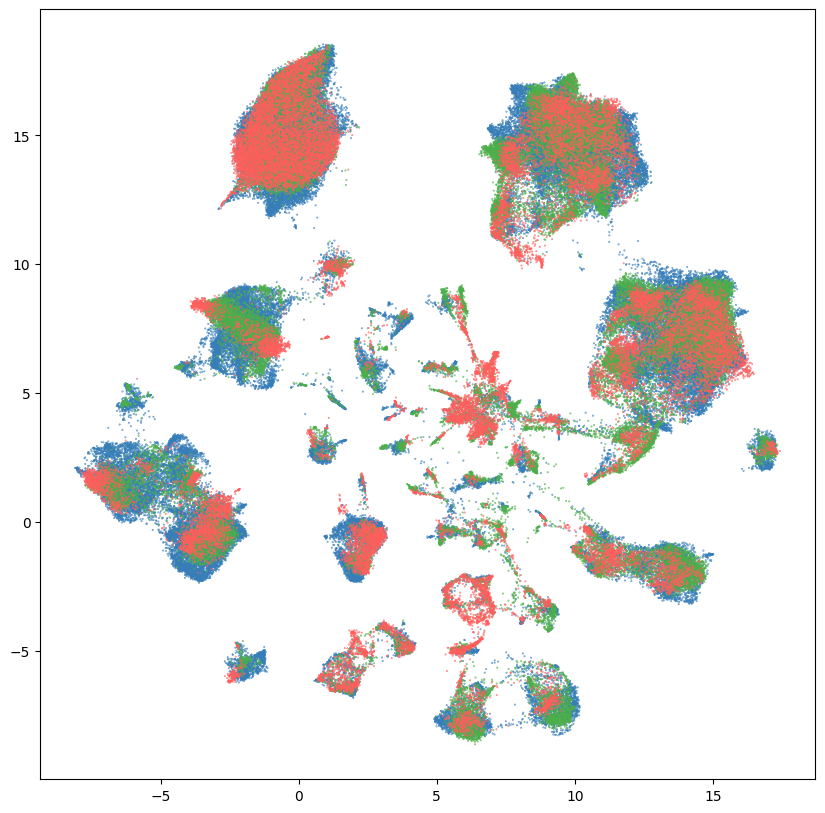

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Color a scatter plot by the 'color_hex_triplet' column, with size=0.5 and a small marker type.
plt.scatter(cell_extended['x'][::10], cell_extended['y'][::10], c=cell_extended['color_hex_triplet'][::10], s=0.5, marker='.')

For more examples of using this specific dataset see the [HMBA-BG clustering and annotations](https://alleninstitute.github.io/abc_atlas_access/notebooks/hmba_bg_clustering_analysis_and_annotation.html) tutorial. You can find tutorials for all the data released we've released through through ABC Atlas Access on the following webpage: [https://alleninstitute.github.io/abc_atlas_access/intro.html](https://alleninstitute.github.io/abc_atlas_access/intro.html).